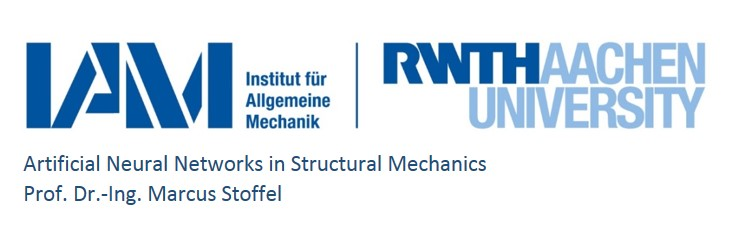

# Exercise 2

## Multi-Layer Perceptron & Delta Rule

Develop a multi layer perceptron network with threshold activation function in order to learn the XOR function. Implement the delta rule so the network learns the correct weights and threshold value. 

1. The Network should have 3 layers. 1 input layer, 1 hidden layer and 1 output layer


2. Input Layer has 2 neurons, Hidden Layer has 2 neurons and Output Layer has 1 neuron.


3. Highly recommended to use the same variable names and notation so it is easier to debug and compare codes


4. Use functions during code implementation to reuse code.


5. The weights and threshold for the last output layer are given to you. Do not train those weights. Apply the delta rule only to the neurons in the hidden layer. The desired outputs for the hidden layer are also given to you. 


6. The code should be display the outputs of the network and plots before and after training and show the intermediate calculations in training. 


7. Experiment with different random initial weight and threshold values for the hidden layer and see what you get.


8. What do you think happens if you try to use the error of the output neuron to train the hidden neuron ?! Is this possible ?! Why or why not. Play around with it and see what happens. 

## Notation

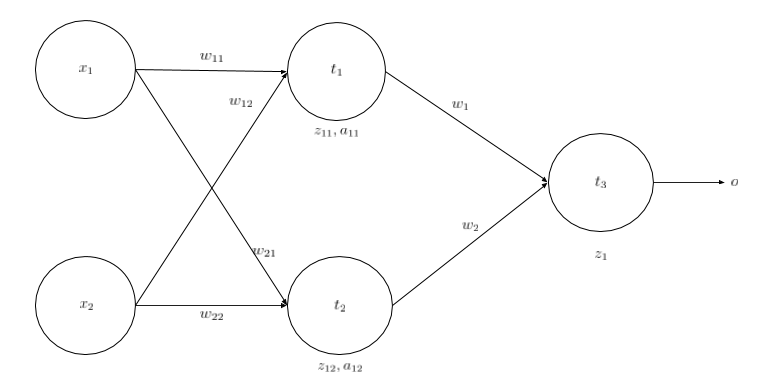

Notation 

x - inputs

w - weights

t - thresholds

z - weighted sums

a - values after activation [0 or 1]

o - network output

y - desired output

### Importing Necessary Python Libraries

In [1]:
import numpy as np

## Global Variables

Define the global variables like the XOR truth table and the weights and threshold at the beginning so that these values can be accessed at any other part of the code even including functions. The global keyword is used inside a function to inform python that we are referring to the global variable. 

### XOR Truth Table

|x1| x2| XOR |
| --- | --- | --- |
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [2]:
#Defining the XOR truth table as a numpy matrix
xor = np.array([[0,0,0],[0,1,1],[1,0,1],[1,0,1]])
xor.shape[0]

4

The matrix can be written in one line but it is split into multiple lines just for better readibility. To access a component of the matrix just use xor[0, 1] or xor[1, 2]. Remember that indexing in python starts from 0 so xor[0, 0] would represent the component in the first row and first column.

### Weights and Thresholds

In [3]:
# Function to initialise weights and threshold values
global w11
global w12
global w21
global w22
global t1
global t2
w11 = 2
w12 = 2
w21 = 3
w22 = 3
t1 = -7
t2 = -5


In [4]:
#Weights and thresholds between hidden layer and output layer. 
#DO NOT CHANGE or TRAIN THESE WEIGHTS

w1 = -1
w2 = -1

t3 = -1

In [5]:
#DO NOT CHANGE THESE VALUES
#Use them in the delta rule implementation

#desired outputs of neuron t1 in hidden layer
y1 = np.array([[1], [1], [0], [1]])

#desired outputs of neuron t2 in hidden layer
y2 = np.array([[1], [0], [1], [1]])

In [6]:
# Function for deciding activation of neuron
def activation(w1,w2,x1,x2,t):
    # w1, w2: input weights
    # x1, x2: inputs
    # t: threshold value
    # Weighted Value
    z = w1*x1 + w2*x2
    if z-t >= 0:
        return 1
    else:
        return 0


In [7]:
# Function implementing delta rule
def deltaRule(alpha,error,x,w_old,t_old):
    # x: input
    # w_old: current weight value
    # t_old: current threshold value
    # error: error between the current value and the desired value
    # alpha: learning rate
    w_new = w_old + alpha*error*x
    t_new = t_old - alpha*error
    return w_new, t_new

In [8]:
alpha = 0.5 # Learning rate
num_epochs = 5 # Number of Epochs
epochs = range(0,num_epochs + 1)
for epoch in epochs:
    for kk in range(0,xor.shape[0]):
        print('**************************************************************')
        print('Epoch: ' + str(epoch) + ' | Row: ' + str(kk + 1))
        print('-----------------Before Update-------------------')
        print('x1: ' + str(xor[kk,0]))
        print('x2: ' + str(xor[kk,1]))
        print('a11: ' + str(activation(w11,w12,xor[kk,0],xor[kk,1],t1)))
        print('a12: ' + str(activation(w21,w22,xor[kk,0],xor[kk,1],t2)))
        print('o:' + str(activation(w1,w2,activation(w11,w12,xor[kk,0],xor[kk,1],t1),activation(w21,w22,xor[kk,0],xor[kk,1],t2),t3)))
        print('y:' + str(int(xor[kk,2])))
        print('w11: ' + str(w11))
        print('w12: ' + str(w12))
        print('w21: ' + str(w21))
        print('w22: ' + str(w22))
        print('t1: ' + str(t1))
        print('t2: ' + str(t2))
        # Hidden Neuron t1
        error1 = int(y1[kk]) - activation(w11,w12,xor[kk,0],xor[kk,1],t1)
        w11,t1 = deltaRule(alpha,error1,xor[kk,0],w11,t1)
        w12,_ = deltaRule(alpha,error1,xor[kk,1],w12,t1)
    
        # Hidden Neuron t2
        error2 = int(y2[kk]) - activation(w21,w22,xor[kk,0],xor[kk,1],t2)
        w21,t2 = deltaRule(alpha,error2,xor[kk,0],w21,t2)
        w22,_ = deltaRule(alpha,error2,xor[kk,1],w22,t2)
        print('-----------------After Update-------------------')
        print('Errors')
        print('Error 1: ' + str(error1))
        print('Error 2: ' + str(error2))
        print('w11: ' + str(w11))
        print('w12: ' + str(w12))
        print('w21: ' + str(w21))
        print('w22: ' + str(w22))
        print('t1: ' + str(t1))
        print('t2: ' + str(t2))
    

**************************************************************
Epoch: 0 | Row: 1
-----------------Before Update-------------------
x1: 0
x2: 0
a11: 1
a12: 1
o:0
y:0
w11: 2
w12: 2
w21: 3
w22: 3
t1: -7
t2: -5
-----------------After Update-------------------
Errors
Error 1: 0
Error 2: 0
w11: 2.0
w12: 2.0
w21: 3.0
w22: 3.0
t1: -7.0
t2: -5.0
**************************************************************
Epoch: 0 | Row: 2
-----------------Before Update-------------------
x1: 0
x2: 1
a11: 1
a12: 1
o:0
y:1
w11: 2.0
w12: 2.0
w21: 3.0
w22: 3.0
t1: -7.0
t2: -5.0
-----------------After Update-------------------
Errors
Error 1: 0
Error 2: -1
w11: 2.0
w12: 2.0
w21: 3.0
w22: 2.5
t1: -7.0
t2: -4.5
**************************************************************
Epoch: 0 | Row: 3
-----------------Before Update-------------------
x1: 1
x2: 0
a11: 1
a12: 1
o:0
y:1
w11: 2.0
w12: 2.0
w21: 3.0
w22: 2.5
t1: -7.0
t2: -4.5
-----------------After Update-------------------
Errors
Error 1: -1
Error 2: 0
w11: 1.5
w1